In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## PCA using PCA algo on breast cancer dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [39]:
df=load_breast_cancer()

In [40]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
df.target #malignant=0, benign =1 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
print(df.DESCR) #describe the inbuilt dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [16]:
# why it shows like this when call in print()? 

In [42]:
df=pd.DataFrame(df["data"],columns=df["feature_names"])

In [18]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Standardization

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
scaler.fit(df)

StandardScaler()

In [24]:
scaled_data=scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Applying PCA algorithms 

In [25]:
from sklearn.decomposition import PCA

In [33]:
pca=PCA(n_components=2) 
#into how many features you want to reduce the features , initialize them into n_components
#if doesn't pass the value , conclude for all

In [30]:
data_with_pca=pca.fit_transform(scaled_data)
data_with_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [32]:
pca.explained_variance_ #pca 1 always is greater than pca2

array([13.30499079,  5.7013746 ])

Text(0, 0.5, 'PCA2')

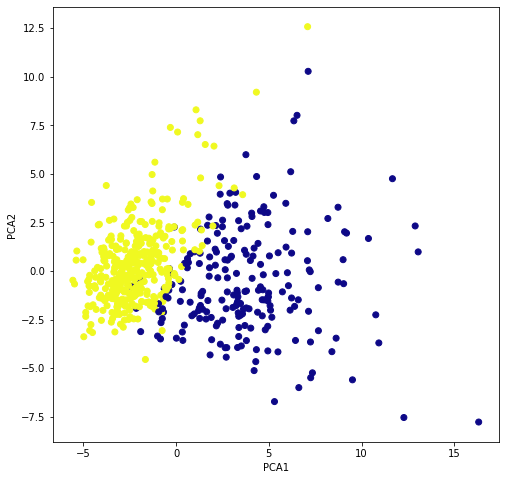

In [41]:
plt.figure(figsize=(8,8))
plt.scatter(data_with_pca[:,0],data_with_pca[:,1],c=df['target'],cmap="plasma")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

## Now Applying Pca on Iris dataset

In [3]:
df=pd.read_csv("Iris.csv")

In [6]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
#no use of id , so we can drop it
df.drop(columns="Id",inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [75]:
df1=df.loc[:,"SepalLengthCm":"PetalWidthCm"] #{:(all row),First col : last col:step}
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 

In [76]:
scaler.fit(df1)   #standard scale (mean =0 , std=1) in fit method , it computes mean and std

StandardScaler()

In [77]:
scaled_data=scaler.transform(df1)    #transform , applied on test data
scaled_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [78]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) 

In [79]:
data_with_pca=pca.fit_transform(scaled_data) #fit transform applied on train data
data_with_pca

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [80]:
pca.explained_variance_

array([2.93035378, 0.92740362])

Text(0, 0.5, 'PCA2')

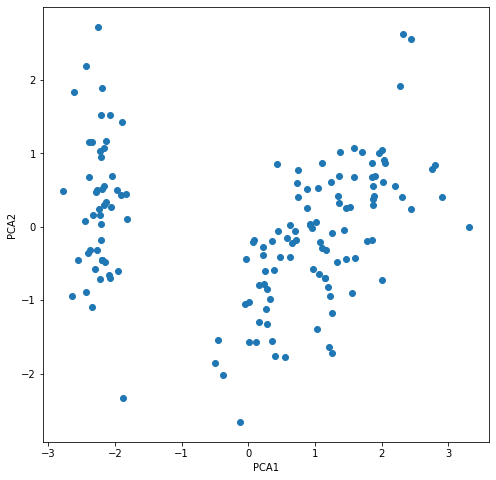

In [82]:
plt.figure(figsize=(8,8))
plt.scatter(data_with_pca[:,0],data_with_pca[:,1],cmap="plasma")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
#Remember for comparing them with species, we need to convert species into numeric data first.

# PCA using Maths

In [8]:
data={'x':[4,8,13,7],'y':[11,4,5,14]}
data

{'x': [4, 8, 13, 7], 'y': [11, 4, 5, 14]}

In [10]:
df=pd.DataFrame(data)
df

,x,y
0,4,11
1,8,4
2,13,5
3,7,14


In [12]:
df["sample"]=['s1','s2','s3','s4']
df

,x,y,sample
0,4,11,s1
1,8,4,s2
2,13,5,s3
3,7,14,s4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       4 non-null      int64 
 1   y       4 non-null      int64 
 2   sample  4 non-null      object
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


In [21]:
df.set_index("sample")
df

,x,y
sample,,
s1,4,11
s2,8,4
s3,13,5
s4,7,14


In [23]:
x_mean=df['x'].mean()
x_mean

8.0

In [24]:
y_mean=df['y'].mean()
y_mean

8.5

In [25]:
#cov()
#xx xy=yx yy

In [26]:
cov= df.cov()
cov

,x,y
x,14.0,-11.0
y,-11.0,23.0


In [27]:
eigen_values,eigen_vectors= np.linalg.eig(cov)

In [28]:
eigen_values

array([ 6.61513568, 30.38486432])

In [29]:
eigen_vectors #they already calculated normalization

array([[-0.83025082,  0.55738997],
       [-0.55738997, -0.83025082]])

In [32]:
eigen_vectors[0:1]

array([[-0.83025082,  0.55738997]])

In [33]:
pca1= eigen_vectors[0:1]*np.array([df.x-x_mean],[df.y-y_mean])

TypeError: Field elements must be 2- or 3-tuples, got 'sample
s1    2.5
s2   -4.5
s3   -3.5
s4    5.5
Name: y, dtype: float64'

In [34]:
np.array([df.x-x_mean],[df.y-y_mean])

TypeError: Field elements must be 2- or 3-tuples, got 'sample
s1    2.5
s2   -4.5
s3   -3.5
s4    5.5
Name: y, dtype: float64'

# Trying using PCA function

In [35]:
df

,x,y
sample,,
s1,4,11
s2,8,4
s3,13,5
s4,7,14


In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 

In [37]:
scaler.fit(df) 

StandardScaler()

In [39]:
scaled_data=scaler.transform(df)    #transform , applied on test data
scaled_data

array([[-1.2344268 ,  0.60192927],
       [ 0.        , -1.08347268],
       [ 1.5430335 , -0.84270097],
       [-0.3086067 ,  1.32424438]])

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1) 

In [48]:
data_with_pca=pca.fit_transform(scaled_data) #fit transform applied on train data
data_with_pca

array([[-1.29849983],
       [ 0.76613088],
       [ 1.68696902],
       [-1.15460007]])

In [49]:
pca.explained_variance_

array([2.15067471])

In [44]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)
# calculate the mean of each column
M = mean(A.T, axis=1)
print("Mean of Columns")
print(M)
print()
# center columns by subtracting column means
C = A - M
print(C)
print()
print("calculate covariance matrix of centered matrix")
V = cov(C.T)
print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print()
print(values)
print()
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
Mean of Columns
[3. 4.]

[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]

calculate covariance matrix of centered matrix
[[4. 4.]
 [4. 4.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

[8. 0.]

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


## Now applying Pca on Iris data using Manually calculation

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.drop(columns="Id",inplace=True)

In [10]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
#now we need only numerical data
df1=df.loc[:,"SepalLengthCm":"PetalWidthCm"]

In [12]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [14]:
A=array(df1)

In [19]:
A

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
# calculate the mean of each column
M = mean(A.T, axis=1)
print("Mean of Columns")
print(M)

Mean of Columns
[5.84333333 3.054      3.75866667 1.19866667]


In [21]:
np.mean(df1.SepalLengthCm) #testing 

5.843333333333335

In [22]:
# center columns by subtracting column means
C = A - M
print(C)

[[-7.43333333e-01  4.46000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-9.43333333e-01 -5.40000000e-02 -2.35866667e+00 -9.98666667e-01]
 [-1.14333333e+00  1.46000000e-01 -2.45866667e+00 -9.98666667e-01]
 [-1.24333333e+00  4.60000000e-02 -2.25866667e+00 -9.98666667e-01]
 [-8.43333333e-01  5.46000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-4.43333333e-01  8.46000000e-01 -2.05866667e+00 -7.98666667e-01]
 [-1.24333333e+00  3.46000000e-01 -2.35866667e+00 -8.98666667e-01]
 [-8.43333333e-01  3.46000000e-01 -2.25866667e+00 -9.98666667e-01]
 [-1.44333333e+00 -1.54000000e-01 -2.35866667e+00 -9.98666667e-01]
 [-9.43333333e-01  4.60000000e-02 -2.25866667e+00 -1.09866667e+00]
 [-4.43333333e-01  6.46000000e-01 -2.25866667e+00 -9.98666667e-01]
 [-1.04333333e+00  3.46000000e-01 -2.15866667e+00 -9.98666667e-01]
 [-1.04333333e+00 -5.40000000e-02 -2.35866667e+00 -1.09866667e+00]
 [-1.54333333e+00 -5.40000000e-02 -2.65866667e+00 -1.09866667e+00]
 [-4.33333333e-02  9.46000000e-01 -2.55866667e+00 -9.98666667e

In [23]:
print("calculate covariance matrix of centered matrix")
V = cov(C.T)
print(V)

calculate covariance matrix of centered matrix
[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [24]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)

[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]
[4.22484077 0.24224357 0.07852391 0.02368303]


In [25]:
P = vectors.T.dot(C.T)
print(P.T)

[[-2.68420713e+00 -3.26607315e-01 -2.15118370e-02  1.00615724e-03]
 [-2.71539062e+00  1.69556848e-01 -2.03521425e-01  9.96024240e-02]
 [-2.88981954e+00  1.37345610e-01  2.47092410e-02  1.93045428e-02]
 [-2.74643720e+00  3.11124316e-01  3.76719753e-02 -7.59552741e-02]
 [-2.72859298e+00 -3.33924564e-01  9.62296998e-02 -6.31287327e-02]
 [-2.27989736e+00 -7.47782713e-01  1.74325619e-01 -2.71468037e-02]
 [-2.82089068e+00  8.21045110e-02  2.64251085e-01 -5.00996251e-02]
 [-2.62648199e+00 -1.70405349e-01 -1.58015103e-02 -4.62817610e-02]
 [-2.88795857e+00  5.70798026e-01  2.73354061e-02 -2.66154143e-02]
 [-2.67384469e+00  1.06691704e-01 -1.91533300e-01 -5.58909660e-02]
 [-2.50652679e+00 -6.51935014e-01 -6.92749958e-02 -1.66082478e-02]
 [-2.61314272e+00 -2.15206320e-02  1.07650353e-01 -1.57704569e-01]
 [-2.78743398e+00  2.27740189e-01 -2.00327788e-01 -7.23508674e-03]
 [-3.22520045e+00  5.03279909e-01  6.84136292e-02 -2.19466641e-02]
 [-2.64354322e+00 -1.18619490e+00 -1.44505704e-01  1.56980962e

# Another Question

In [17]:
data={'x':[4,8,13,7],'y':[11,4,5,14]} 
data

{'x': [4, 8, 13, 7], 'y': [11, 4, 5, 14]}

In [20]:
df=pd.DataFrame(data)

In [22]:
A=np.array(df)

In [23]:
A

array([[ 4, 11],
       [ 8,  4],
       [13,  5],
       [ 7, 14]], dtype=int64)

In [57]:
# calculate the mean of each column
M = mean(A.T, axis=1)
print("Mean of Columns")
print(M)

Mean of Columns
[8.  8.5]


In [29]:
M= np.mean(A.T,axis=1)
M

array([8. , 8.5])

In [31]:
m=np.mean(A.T)
m

8.25

In [58]:
# center columns by subtracting column means
C = A - M
print(C)

[[-4.   2.5]
 [ 0.  -4.5]
 [ 5.  -3.5]
 [-1.   5.5]]


In [59]:
print("calculate covariance matrix of centered matrix")
V = cov(C.T)
print(V)

calculate covariance matrix of centered matrix
[[ 14. -11.]
 [-11.  23.]]


In [63]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)

[[-0.83025082  0.55738997]
 [-0.55738997 -0.83025082]]


In [66]:
print(values)

[ 6.61513568 30.38486432]


In [68]:
P = vectors.T.dot(C.T)
print(np.round((P.T),2))

[[ 1.93 -4.31]
 [ 2.51  3.74]
 [-2.2   5.69]
 [-2.24 -5.12]]


In [ ]:
#126, 128, 128, 130, 130, 132
#78, 80,82,82,84,86

In [32]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [34]:
data={'x':[126,128,128,130,130,132],'y':[78,80,82,82,84,86]}

In [36]:
data

{'x': [126, 128, 128, 130, 130, 132], 'y': [78, 80, 82, 82, 84, 86]}

In [37]:
df=pd.DataFrame(data)

In [40]:
df

,x,y
0,126,78
1,128,80
2,128,82
3,130,82
4,130,84
5,132,86


In [41]:
A= np.array(df)

In [42]:
A

array([[126,  78],
       [128,  80],
       [128,  82],
       [130,  82],
       [130,  84],
       [132,  86]], dtype=int64)

In [43]:
mean(A.T,axis=1)

array([129.,  82.])

In [44]:
# center columns by subtracting column means
C = A - M
print(C)

[[118.   69.5]
 [120.   71.5]
 [120.   73.5]
 [122.   73.5]
 [122.   75.5]
 [124.   77.5]]


In [45]:
print("calculate covariance matrix of centered matrix")
V = cov(C.T)
print(V)

calculate covariance matrix of centered matrix
[[4.4 5.6]
 [5.6 8. ]]


In [47]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print()
print(values)

[[-0.80808699 -0.58906316]
 [ 0.58906316 -0.80808699]]

[ 0.31782353 12.08217647]


In [48]:
P = vectors.T.dot(C.T)
print(np.round((P.T),2))

[[ -54.41 -125.67]
 [ -54.85 -128.47]
 [ -53.67 -130.08]
 [ -55.29 -131.26]
 [ -54.11 -132.88]
 [ -54.55 -135.67]]


In [1]:
plt.figure(figsize=(8,8))
plt.scatter(data_with_pca[:,0],data_with_pca[:,1],cmap="plasma")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

NameError: name 'plt' is not defined